# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [38]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [40]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/PythonCourse/FoodHubProj/foodhub_order.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# read the data
df = pd.read_csv(path)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [42]:
df.shape

(1898, 9)

#### Observations: The shape property provides the number of rows (first element) and number of columns (second element) of the dataset. So per the output, there are 1898 rows and 9 columns in the dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   order_id, customer_Id, food_preperation_time and delivery_time are 4 integer
columns in the dataset.
*   cost_of_the_order column is of datatype float and hence will have decimals.
*   The rest of the columns are of type 'object', indicating that they are caregorical.










### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [44]:
df.isnull().values.any()

False

#### Observations: No, there are no missing values in the data as per the output above.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [45]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: The minimum time it takes for the food to be prepared is 20 minutes, while the average time is 27.37 mins and the maximum time is 35 mins.


### **Question 5:** How many orders are not rated?

In [46]:
df[df["rating"] == 'Not given']["rating"].count()

736

#### Observations: There are a total of 736 orders that are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [47]:
# 1. Order ID
df['order_id'].nunique()

1898

In [48]:
# 2. Customer ID
df['customer_id'].nunique()

1200

In [49]:
# 3. Restaurant Name
df['restaurant_name'].nunique()

178

The dataset contains a total of 178 restaurants from which a total of 1898 orders were placed by 1200 unique customers

In [50]:
df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: rating, Length: 178, dtype: int64

Shake Shack restaurant has the highest number of orders, followed by The Meatball Shop and Blue Ribbon Sushi

In [51]:
# 4. Cuisine Type
df['cuisine_type'].nunique()

14

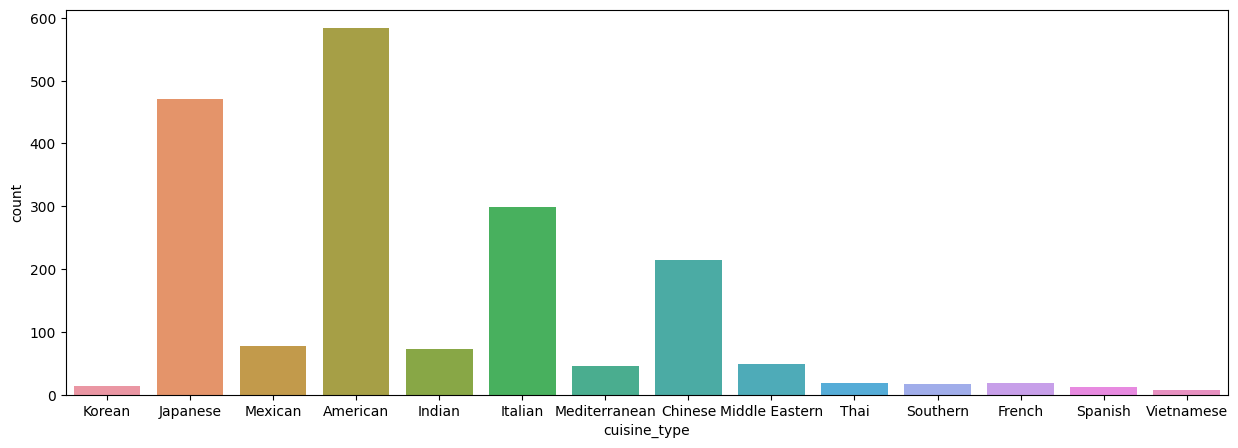

In [52]:
plt.figure(figsize = (15,5))
#Countplot for Cuisine Type
sns.countplot(data=df, x='cuisine_type')
plt.show()

The restaurants in the dataset are of 14 different cuisine types, and the above plot shows the distribution.
Most ordered cuisine is American and the least is Vietnamese.

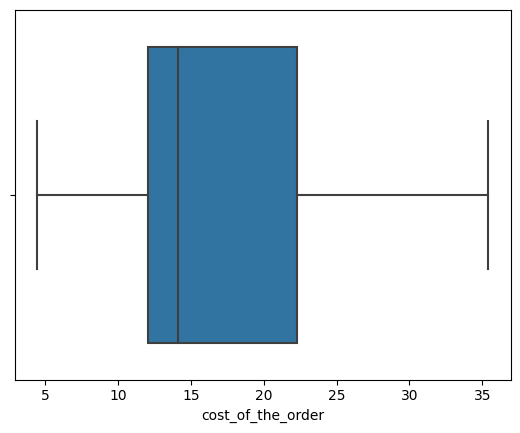

In [53]:
# 5. Cost of the order
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

The boxplot above indicates that the cost of the order data is right skewed or positively skewed

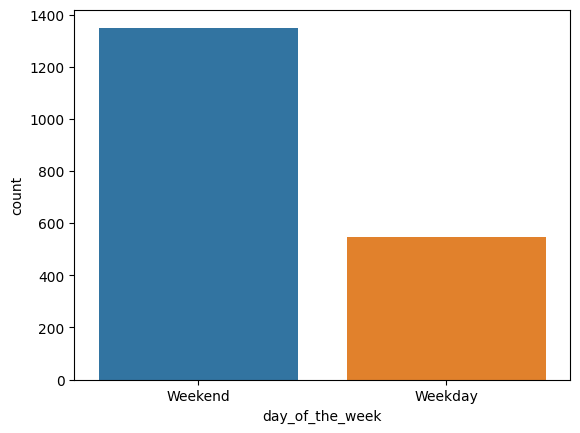

In [54]:
# 6. Day of the week - categorical variable
sns.countplot(data=df, x='day_of_the_week')
plt.show()

This countplot indicates that more orders are placed over the weekends than on weekdays

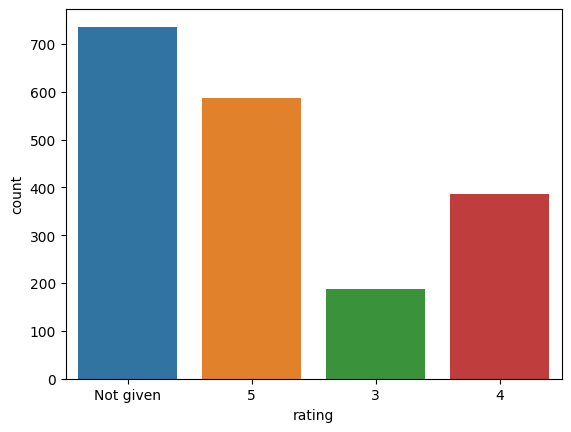

In [55]:
# 7.Rating
sns.countplot(data=df, x ='rating')
plt.show()

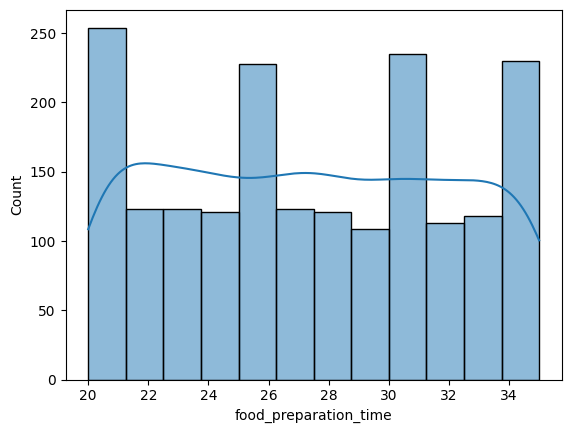

In [56]:
# 8. Food preperation time
sns.histplot(data=df,x='food_preparation_time', kde=True)
plt.show()

We can observe a uniform distribution in the above histplot on food preparation time across all the orders

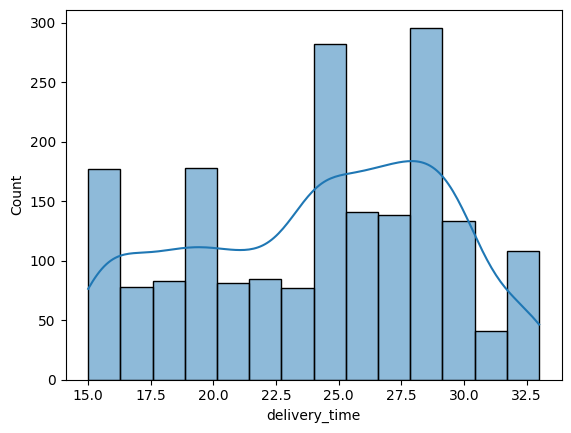

In [57]:
# 9. Delivery time
sns.histplot(data=df,x='delivery_time', kde=True)
plt.show()

From the above histplot, we can tell that the median delivery time is about 25 mins

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [58]:
df['restaurant_name'].value_counts().head()


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: The top 5 restaurants in terms of the number of orders received are -
1. Shake Shack - 219 orders
2. The Meatball Shop - 132 orders
3. Blue Ribbon Sushi - 119 orders
4. Blue Ribbon Fried Chicken - 96 orders
5. Parm - 68 orders


### **Question 8**: Which is the most popular cuisine on weekends?

In [59]:
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [60]:
orders_gt_20 = len(df[df['cost_of_the_order']>20])
percentage = (orders_gt_20 / len(df)) * 100
print("The percentage of the orders that cost more than 20 dollars is", round(percentage, 2), '%')

The percentage of the orders that cost more than 20 dollars is 29.24 %


#### Observations: Percentage of the orders that cost more than 20 dollars is 29.24


### **Question 10**: What is the mean order delivery time?

In [61]:
df['delivery_time'].mean()

24.161749209694417

#### Observations: The mean order delivery time = 24.16


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [62]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The top 3 most frequent customers' Customer IDs and the number of orders they placed respectively are -
* 52832  placed  13 orders
* 47440  placed  10 orders
* 83287  placed  9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

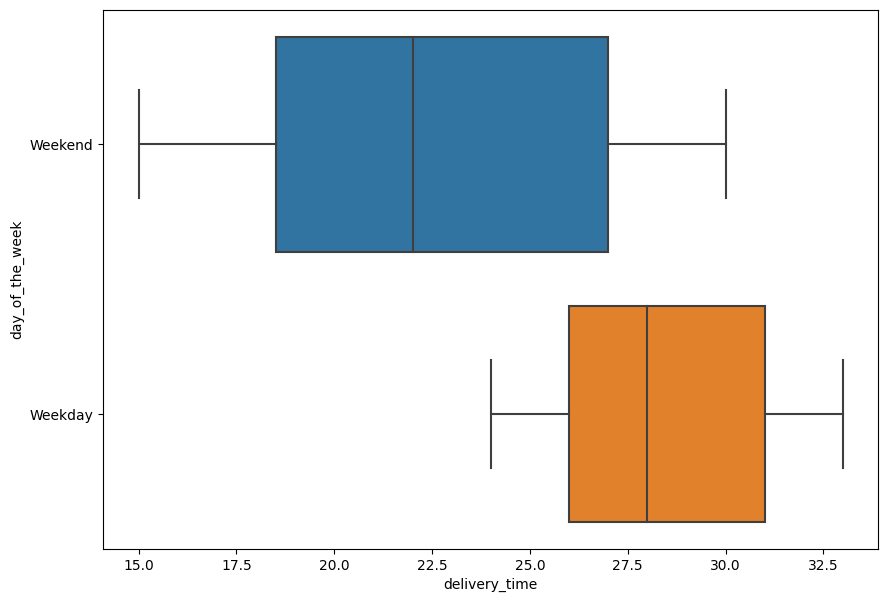

In [63]:
# Relationship between Delivery time and Day of the week
plt.figure(figsize=(10, 7))
sns.boxplot(x = 'delivery_time', y = 'day_of_the_week', data = df)
plt.show()

Clearly the delivery time on the weekends is lesser than that of the weekdays

In [64]:
# Relationship between Orders and Day of the week
num_of_orders_weekdays = df[df['day_of_the_week'] =='Weekday']['order_id'].count()
print('Number of orders on Weekdays',num_of_orders_weekdays)
num_of_orders_weekends = df[df['day_of_the_week'] =='Weekend']['order_id'].count()
print('Number of orders on Weekends',num_of_orders_weekends)

Number of orders on Weekdays 547
Number of orders on Weekends 1351


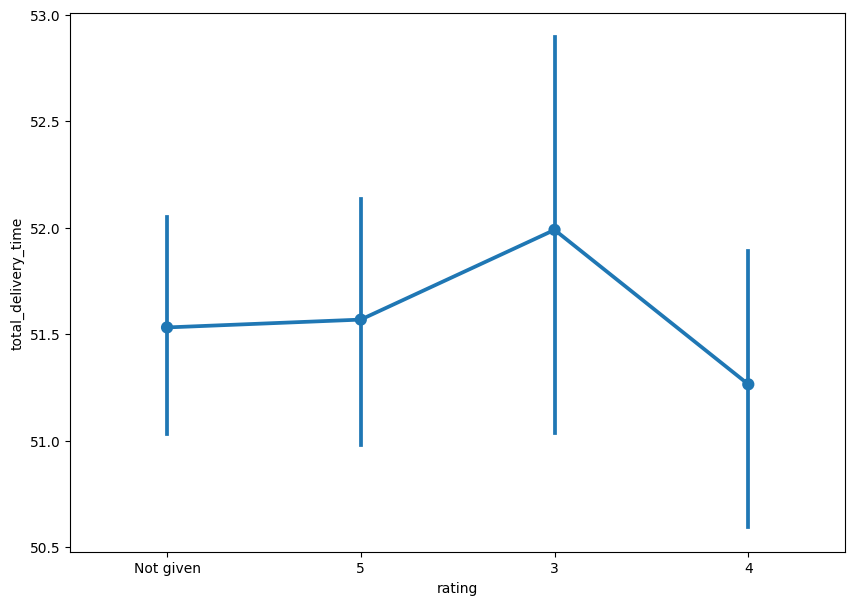

In [65]:
# Relationship between Rating and Total delivery time
# The new column, 'total_delivery_time' = 'food_preparation_time' + 'delivery_time'
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
plt.figure(figsize=(10, 7))
sns.pointplot(x = 'rating', y = 'total_delivery_time', data = df) #'total_delivery_time' = 'food_preparation_time' + 'delivery_time'
plt.show()

The above plot shows that most orders with longer delivery times have a rating of 3.

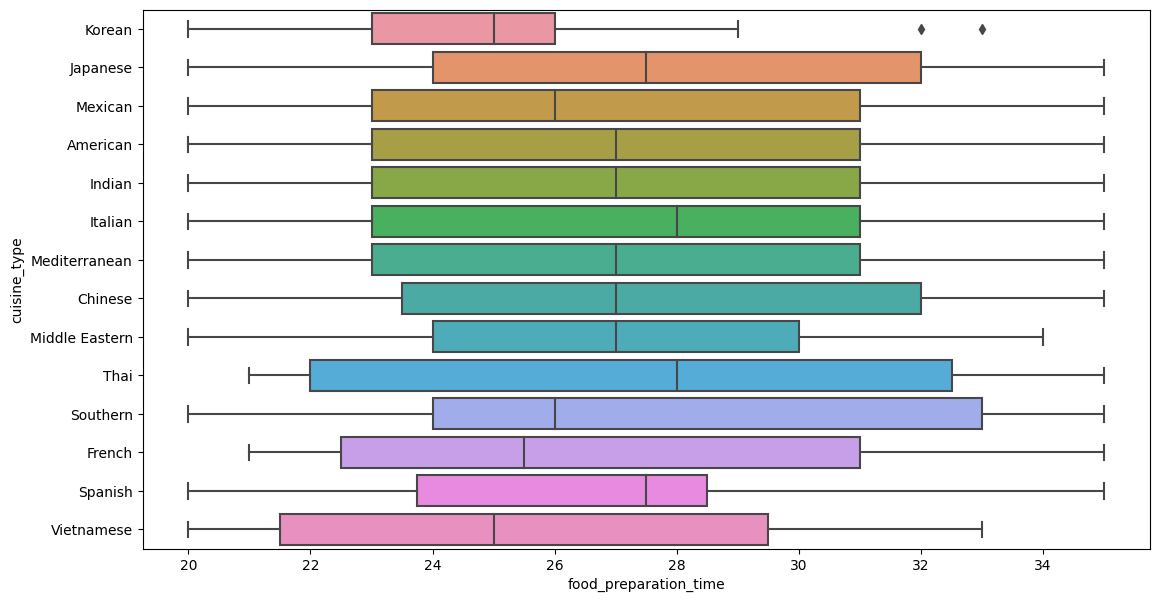

In [66]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(13,7))
sns.boxplot(x = 'food_preparation_time', y = 'cuisine_type', data = df)
plt.show()

* Korean and Vietnamese cuisines are taking less time in food prepration with some outliers for Korean.
* Q1 and Q3 for Mexican, American, Indian, Italian and Mediterranean have been consistently at 23 and 31 mins.
* Thai cusine has the highest median amongst all others and is also slightly negatively skewed.
* The Q3 for Southern cuisine is the highest but is positively skewed.




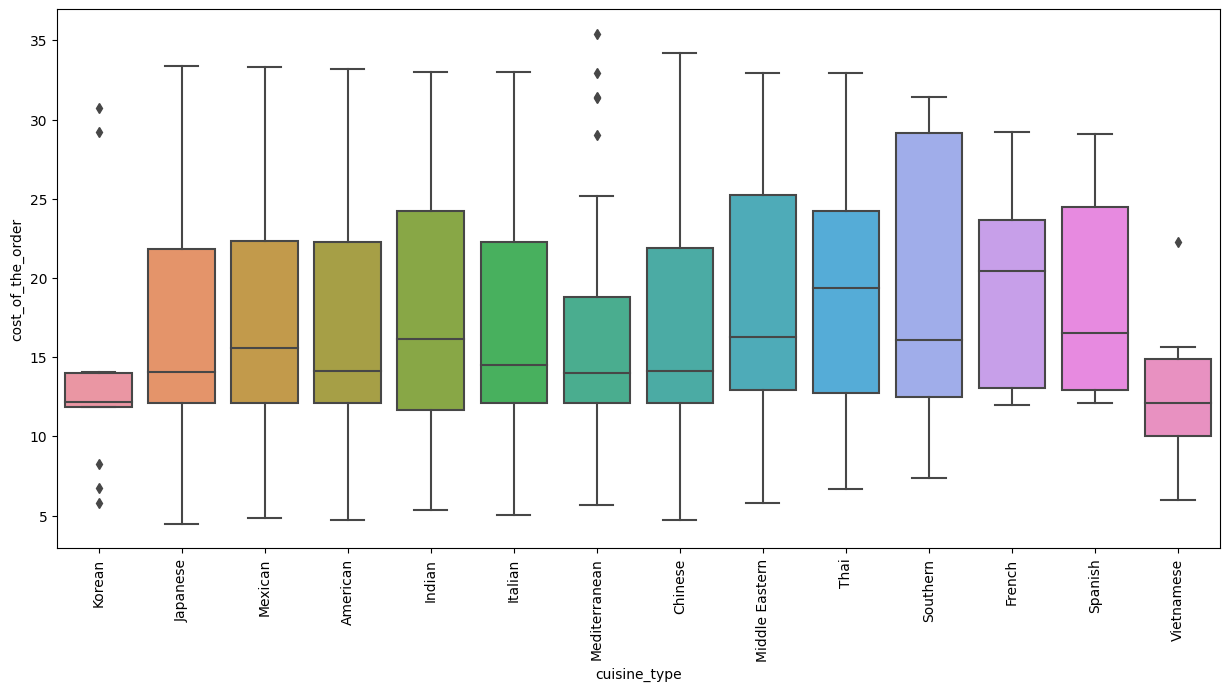

In [67]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 90)
plt.show()

Korean and Vietnamese are less expensive compared to other cuisines. Next would be Mediterranean with some outliers.
Approximately all the cost of the orders from all cuisines range between 10.00 and $25.00

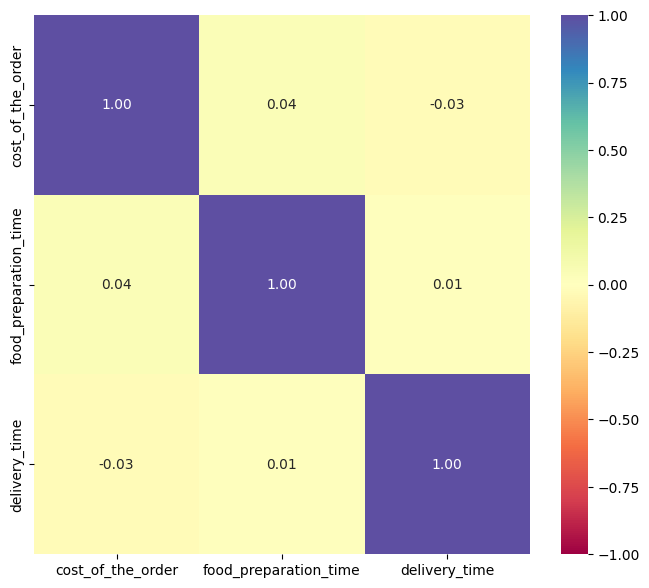

In [68]:
# Checking the heatmap on all the numerical columns
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(8, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There is no strong correlationship between food prep time, delivery time and cost of the order

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [69]:
#As there are orders with no ratings, creating a copy of df filtering out the 'Not given' values in rating column
df_with_ratings = df[df['rating'] != 'Not given'].copy()
#df_with_ratings.head()

#To calculate mean of the rating values, converting dtatayp of 'rating' column to int
df_with_ratings['rating'] = df_with_ratings['rating'].astype('int')

#Creating a temporary table to hold the restaurants with rating count > 50
df_temp = df_with_ratings.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_temp.drop(df_temp[df_temp['rating']<=50].index, inplace=True)
#df_temp.head()

#Dropping the rows that are in df_temp which has the restaurants have rating counts <= 50
df_with_ratings.drop(df_with_ratings[~df_with_ratings['restaurant_name'].isin(df_temp['restaurant_name'])].index, inplace=True)
#df_with_ratings.head()
df_with_ratings.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False)

restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64

#### Observations:
The following restaurants have a rating count of more than 50 and the average rating should be greater than 4:
*   The Meatball Shop
*  Blue Ribbon Fried Chicken
* Shake Shack
*  Blue Ribbon Sushi





### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [70]:
def net_revenue(order_cost):
    if order_cost > 20.00:
        x = order_cost * 0.25
    elif order_cost > 5.00:
        x = order_cost * 0.15
    else:
        x = 0.00
    return x

df['revenue'] = df['cost_of_the_order'].apply(net_revenue)
print("Net revenue generated = $", round(df['revenue'].sum(), 2))

Net revenue generated = $ 6166.3


#### Observations: The net revenue generated by the company across all orders is $6166.3


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [71]:
# we created a new column named 'total_delivery_time' in Question# 12, whcih will be the sum of food+preperation_time and delivery_time
order_count_gt60mins_deliverytime = len(df[df['total_delivery_time'] > 60.00])
percentage = (order_count_gt60mins_deliverytime * 100) / len(df)
print('Percentage of orders that take more than 60 mins to get delivered from the time the order is placed is', round(percentage, 2), '%')

Percentage of orders that take more than 60 mins to get delivered from the time the order is placed is 10.54 %


#### Observations: Percentage of orders that take more than 60 mins to get delivered from the time the order is placed is 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [72]:
mean_delivery_time_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print('Mean delivery time on weekdays =', mean_delivery_time_weekdays)
mean_delivery_time_weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('Mean delivery time on weekends =', mean_delivery_time_weekends)

Mean delivery time on weekdays = 28.340036563071298
Mean delivery time on weekends = 22.4700222057735


#### Observations: Mean delivery time on weekdays is more than on weekends


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  Even though the number of orders on Weekends is greater than the number of orders on Weekdays, the mean delivery time on weekdays is longer.
* Shake Shack, The Meatball Shop, Blue Ribbon Sushi are the top 3 restaurants in terms of highest number of orders.
*  Food preparation on certain cuisine types such as Southern, Thai are usually high hence affecting the total delivery times.
*  Our data analysis shows that most orders with longer delivery times have a lower rating of 3.
*  Number of orders on weekends is more than on weekdays and the most popular cuisine on weekends is American followed by Japanese and Italian.

### Recommendations:

*  Longer delivery times during weekdays could be either due to heavy traffic or less staffing. If less staffing is the reason, FoodHub needs to look into adding more employees for deliveres on weekdays.
*  As Shake Shack, The Meatball Shop, Blue Ribbon Sushi have highest number of orders, exploring ways to reduce delivery times at these restaurants is ideal which would improve the ratings and hence obtain more business.
*  As we have the data on cusinines that take longer time in food preperation which results in longer total delivery time, FoodHub could subside the poor ratings by notifying the customers on the app (with a message on the app while placing the order) that the particular cuisines' (i.e. Thai, Southern, Japanese) food preparation times are genrally higher and hence have to expect delays in delivery times.
*  As more orders come in on weekends, and American, Japanese and Italian being most popular cuisines during the weekends, FoodHub could potentially increase it's revenue by establishing partnerships with other restaurants that are of these three cuisines.

---